Comparação e carteira com o CDI e outros benchmarks

1. Instalando e importando bibliotecas

In [10]:
#usarei a biblioteca yfinance para obter os dados de ativos brasileiros e a Quandl para obter a taxa DI (depósito interbancário), que determina o CDI.
!pip install -q yfinance
!pip install -q quandl

2. Após a instalação, importe essas e outras bibliotecas mostradas a seguir

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import quandl
from datetime import datetime

3. Importando dados pelo input do usuário 

In [12]:
# Solicita ao usuário que insira os códigos dos ativos separados por vírgula
ativos_input = input("Digite os códigos dos ativos separados por vírgula (sem aspas e opcional '.SA'): ")

# Dividir ativos separados por vírgula
ativos = ativos_input.split(',')

# Remover espaços em branco ao redor de cada ativo e adicionar ".SA" se necessário
ativos = [(ativo.strip() + ".SA" if ".SA" not in ativo else ativo.strip()) for ativo in ativos]

Digite os códigos dos ativos separados por vírgula (sem aspas e opcional '.SA'): PETR4,VALE3,BBAS3,ABEV3,CIEL3,EZTC3,ECOR3,OIBR3


In [13]:
# Solicita ao usuário que insira as datas de início e fim
inicio = input("Digite a data de início (no formato 'AAAA-MM-DD'): ")
fim = input("Digite a data de fim (no formato 'AAAA-MM-DD'): ")

# Adiciona aspas simples às datas
inicio = f"'{inicio}'"
fim = f"'{fim}'"

# Converte as datas para objetos datetime
inicio = datetime.strptime(inicio, "'%Y-%m-%d'")
fim = datetime.strptime(fim, "'%Y-%m-%d'")


Digite a data de início (no formato 'AAAA-MM-DD'): 2018-01-01
Digite a data de fim (no formato 'AAAA-MM-DD'): 2023-12-17



4. Resutados colocados pelo usuário 

In [14]:
print("Ativos inseridos pelo usuário:", ativos)
print("Data de início:", inicio)
print("Data de fim:", fim)

Ativos inseridos pelo usuário: ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'CIEL3.SA', 'EZTC3.SA', 'ECOR3.SA', 'OIBR3.SA']
Data de início: 2018-01-01 00:00:00
Data de fim: 2023-12-17 00:00:00


5. Extrair os preços de fechamento de todos esses papéis de uma só vez, para um intervalo específico

In [28]:
# Cria um DataFrame vazio para armazenar os preços
precos = pd.DataFrame()

# Loop através dos ativos e baixa os preços
for ativo in ativos:
    try:
        # Baixa os preços e armazena em um DataFrame
        precos_ativo = yf.download(ativo, start=inicio, end=fim)
        
        # Adiciona os preços ao DataFrame principal Adj Close
        precos[ativo] = precos_ativo['Adj Close']
    except Exception as e:
        print(f"Erro ao baixar preços para {ativo}: {e}")

# Exibe os preços
print(precos)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

             PETR4.SA   VALE3.SA   BBAS3.SA   ABEV3.SA   CIEL3.SA   EZTC3.SA  \
Date                                                                           
2018-01-02   6.032848  26.179432  22.805361  17.242149  16.727848  16.157618   
2018-01-03   6.087526  26.022560  23.096231  17.281895  16.963943  16.026138   
2018-01-04   6.098464  26.129234  23.317846  17.186502  16.977825  16.289097   
2018-01-05   6.134915  26.537111  23.317846  17.250097  17.172258  15.880044   
2018-01-08   6.207820  27.126966  23.373245  17.218302  17.359745  15.953090   
...               ...        ...        ...        ...        ...        ...   
2023-12-11  34.360001  69.740387  53.507530  13.608676   4.347473  18.150000   
2023-12-12  34.080002  69.864815  51.927269  13.523147   4.327756  18.500000   
2023-12-13  34.570000  69.874390  52.402031  13.969800   4.446055  18.450001   
2023-12-14  35.320000  70.257263  52.748215  13.779736   4.416481  18.799999   
2023-12-15  35.400002  70.697571  54.014

In [29]:
# Exibe os preços.ativo
precos_ativo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,27.463547,27.463547,26.642626,26.866512,26.866512,342345
2018-01-03,26.866512,27.538176,25.747074,26.120220,26.120220,551352
2018-01-04,26.120220,26.941141,25.970963,25.970963,25.970963,288492
2018-01-05,25.970963,26.269480,25.896334,26.120220,26.120220,207907
2018-01-08,26.194851,26.194851,25.373928,25.821705,25.821705,537711


In [30]:
precos_ativo.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [31]:
precos.columns

Index(['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'CIEL3.SA', 'EZTC3.SA',
       'ECOR3.SA', 'OIBR3.SA'],
      dtype='object')

In [32]:
#precos.isnull
# Verificar se há valores nulos em cada coluna
dados_faltantes_por_coluna = precos.isnull().sum()
dados_faltantes_por_coluna

PETR4.SA    0
VALE3.SA    0
BBAS3.SA    0
ABEV3.SA    0
CIEL3.SA    0
EZTC3.SA    0
ECOR3.SA    0
OIBR3.SA    0
dtype: int64

3. Simulação a criação de uma carteira  Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira A carteira terá um valor investido total de R$ 20 mil, distibuídos nos seguintes ativos

6. Grafico de linhas das empresas escolhidas 

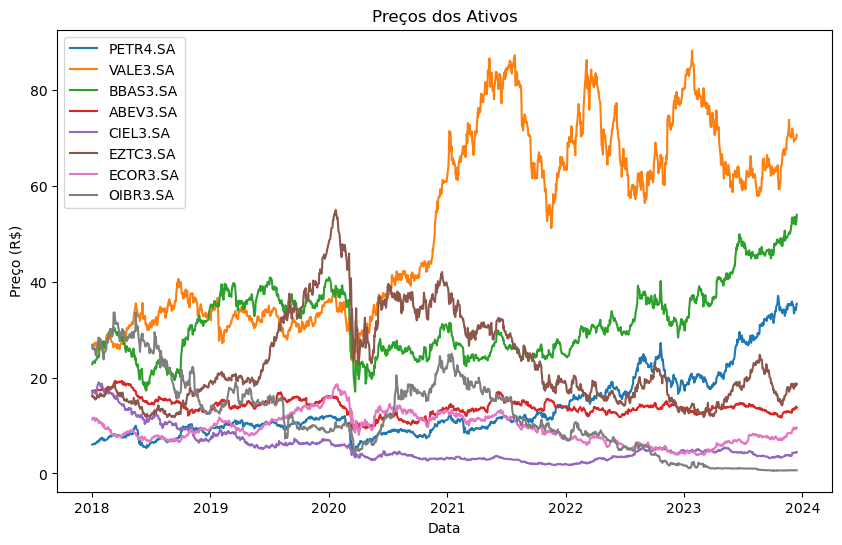

In [20]:
import matplotlib.pyplot as plt

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Loop através das colunas do DataFrame precos e plota cada uma delas
for coluna in precos.columns:
    plt.plot(precos.index, precos[coluna], label=coluna)

# Adiciona título e rótulos dos eixos
plt.title('Preços dos Ativos')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()


7. Escolha o ano para entender 

Digite o ano desejado para visualizar o gráfico: 2023


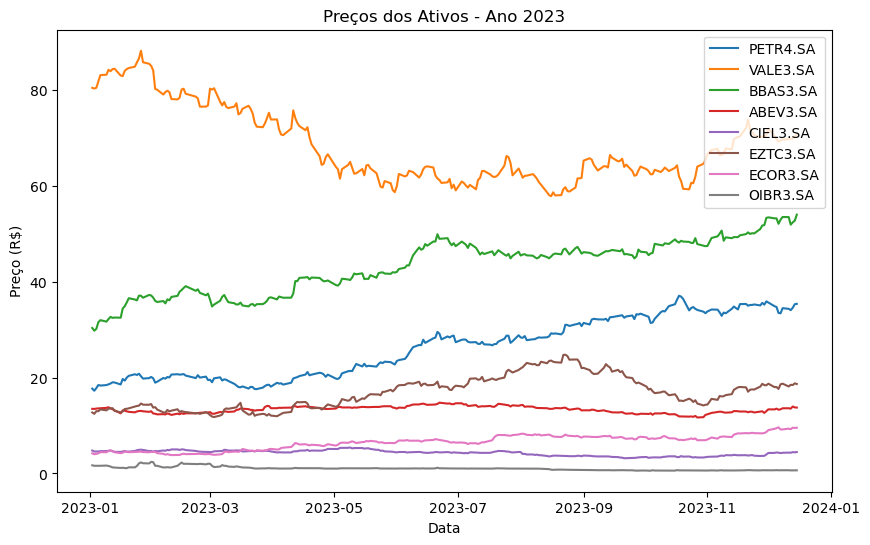

As empresas com os maiores preços de fechamento médios em 2023 foram: VALE3.SA, BBAS3.SA e PETR4.SA.


In [21]:
# Solicita ao usuário que insira o ano desejado
ano_desejado = int(input("Digite o ano desejado para visualizar o gráfico: "))

# Filtra o DataFrame de preços pelo ano desejado
precos_ano_desejado = precos.loc[str(ano_desejado)]

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plot dos dados
for coluna in precos_ano_desejado.columns:
    plt.plot(precos_ano_desejado.index, precos_ano_desejado[coluna], label=coluna)

# Adiciona título e rótulos dos eixos
plt.title(f'Preços dos Ativos - Ano {ano_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

# Calcula o preço de fechamento médio de cada empresa para o ano desejado
precos_ano_desejado_mean = precos.loc[str(ano_desejado)].mean()

# Ordena as empresas com base no preço de fechamento médio
ranking_empresas = precos_ano_desejado_mean.sort_values(ascending=False)

# Cria uma frase com base no ranking
frase_ranking = f"As empresas com os maiores preços de fechamento médios em {ano_desejado} foram: {ranking_empresas.index[0]}, {ranking_empresas.index[1]} e {ranking_empresas.index[2]}."

print(frase_ranking)



8. Simulação a criação de uma carteira. FALTAM AJUSTES

In [46]:
# Item 1: Solicitar ao usuário as ações desejadas
acoes_escolhidas = input("Digite as ações que deseja investir, separadas por vírgula (por exemplo, PETR4.SA,VALE3.SA): ").split(',')

# Item 2: Solicitar ao usuário as datas de início e fim
data_inicio = input("Digite a data de início (no formato 'AAAA-MM-DD'): ")
data_fim = input("Digite a data de fim (no formato 'AAAA-MM-DD'): ")

# Item 3: Solicitar ao usuário a quantidade de ações em lotes
quantidade_lotes = int(input("Digite a quantidade de ações em lotes (múltiplo de 100, mínimo 100): "))
if quantidade_lotes < 100 or quantidade_lotes % 100 != 0:
    print("A quantidade de ações em lotes deve ser múltiplo de 100 e no mínimo 100.")
    exit()

# Item 4: Calcular o valor total do lote de ações na data de início
precos.index = pd.to_datetime(precos.index)
while data_inicio not in precos.index.strftime('%Y-%m-%d'):
    print("A data de início fornecida não está presente nos dados.")
    data_inicio = input("Por favor, digite outra data de início (no formato 'AAAA-MM-DD'): ")
valores_iniciais = precos.loc[data_inicio, acoes_escolhidas]
valor_inicial_total = sum(valores_iniciais * quantidade_lotes)

# Item 5: Calcular o valor total do lote de ações na data de fim e determinar lucro ou prejuízo
while data_fim not in precos.index.strftime('%Y-%m-%d'):
    print("A data de fim fornecida não está presente nos dados.")
    data_fim = input("Por favor, digite outra data de fim (no formato 'AAAA-MM-DD'): ")
valores_finais = precos.loc[data_fim, acoes_escolhidas]
valor_final_total = sum(valores_finais * quantidade_lotes)

variacao_valor_total = valor_final_total - valor_inicial_total

# Determinar se houve lucro ou prejuízo
if variacao_valor_total > 0:
    resultado = "lucro"
elif variacao_valor_total < 0:
    resultado = "prejuízo"
else:
    resultado = "sem variação"

# Exibir resultados com duas casas decimais
print("O valor total do lote de ações na data de início foi: {:.2f}".format(valor_inicial_total))
print("O valor total do lote de ações na data de fim foi: {:.2f}".format(valor_final_total))
print("A variação no valor do lote de ações foi de: {:.2f}".format(variacao_valor_total))
print("Resultado:", resultado)



Digite as ações que deseja investir, separadas por vírgula (por exemplo, PETR4.SA,VALE3.SA): PETR4.SA,VALE3.SA
Digite a data de início (no formato 'AAAA-MM-DD'): 2023-01-02
Digite a data de fim (no formato 'AAAA-MM-DD'): 2023-11-29
Digite a quantidade de ações em lotes (múltiplo de 100, mínimo 100): 100
O valor total do lote de ações na data de início foi: 9819.17
O valor total do lote de ações na data de fim foi: 10553.51
A variação no valor do lote de ações foi de: 734.35
Resultado: lucro


9. Consolidação de benchmarks

Voltando agora para a biblioteca yfinance, vou baixar também os dados de IBOV e dólar, para usar como benchmark:


In [39]:
benckhmarks = ['^BVSP', 'USDBRL=X']
benchs = pd.DataFrame()
for i in benckhmarks:
    benchs[i] = yf.download(i, start = inicio, end = fim)['Adj Close']
benchs

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,^BVSP,USDBRL=X
Date,,
2018-01-02,77891.0,3.311000
2018-01-03,77995.0,3.257800
2018-01-04,78647.0,3.235500
2018-01-05,79071.0,3.233100
2018-01-08,79379.0,3.226600
...,...,...
2023-12-11,126916.0,4.893286
2023-12-12,126403.0,4.936700
2023-12-13,129465.0,4.964500


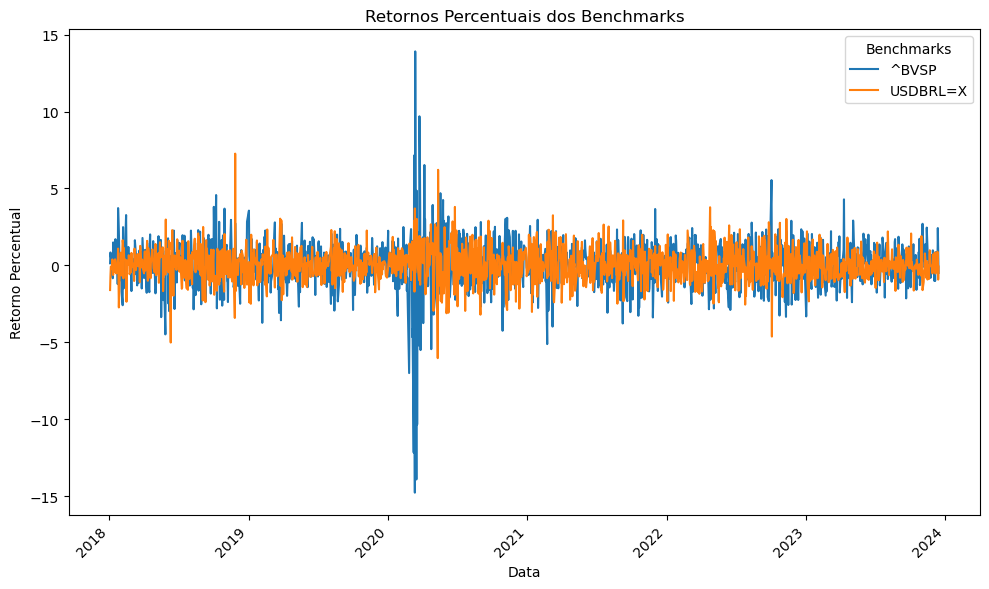

In [43]:
# Calculando os retornos percentuais
benchs_returns = benchs.pct_change() * 100

# Plotando o gráfico de linhas dos retornos percentuais
benchs_returns.plot(figsize=(10, 6))
plt.title('Retornos Percentuais dos Benchmarks')
plt.xlabel('Data')
plt.ylabel('Retorno Percentual')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhorar a legibilidade
plt.legend(title='Benchmarks')
plt.tight_layout()  # Ajusta automaticamente o layout para evitar que os rótulos se sobreponham
plt.show()


In [47]:
# Concatenando os DataFrames de benchmarks e preços das ações ao longo do eixo das colunas
data = pd.concat([benchs, precos], axis=1)

# Exibindo o DataFrame resultante
print(data)


               ^BVSP  USDBRL=X   PETR4.SA   VALE3.SA   BBAS3.SA   ABEV3.SA  \
Date                                                                         
2018-01-02   77891.0  3.311000   6.032848  26.179432  22.805361  17.242149   
2018-01-03   77995.0  3.257800   6.087526  26.022560  23.096231  17.281895   
2018-01-04   78647.0  3.235500   6.098464  26.129234  23.317846  17.186502   
2018-01-05   79071.0  3.233100   6.134915  26.537111  23.317846  17.250097   
2018-01-08   79379.0  3.226600   6.207820  27.126966  23.373245  17.218302   
...              ...       ...        ...        ...        ...        ...   
2023-12-11  126916.0  4.893286  34.360001  69.740387  53.507530  13.608676   
2023-12-12  126403.0  4.936700  34.080002  69.864815  51.927269  13.523147   
2023-12-13  129465.0  4.964500  34.570000  69.874390  52.402031  13.969800   
2023-12-14  130842.0  4.918400  35.320000  70.257263  52.748215  13.779736   
2023-12-15  130197.0  4.914600  35.400002  70.697571  54.014248 

Digite os códigos das ações que deseja incluir no gráfico, separados por vírgula (sem aspas e opcional '.SA'): PETR4


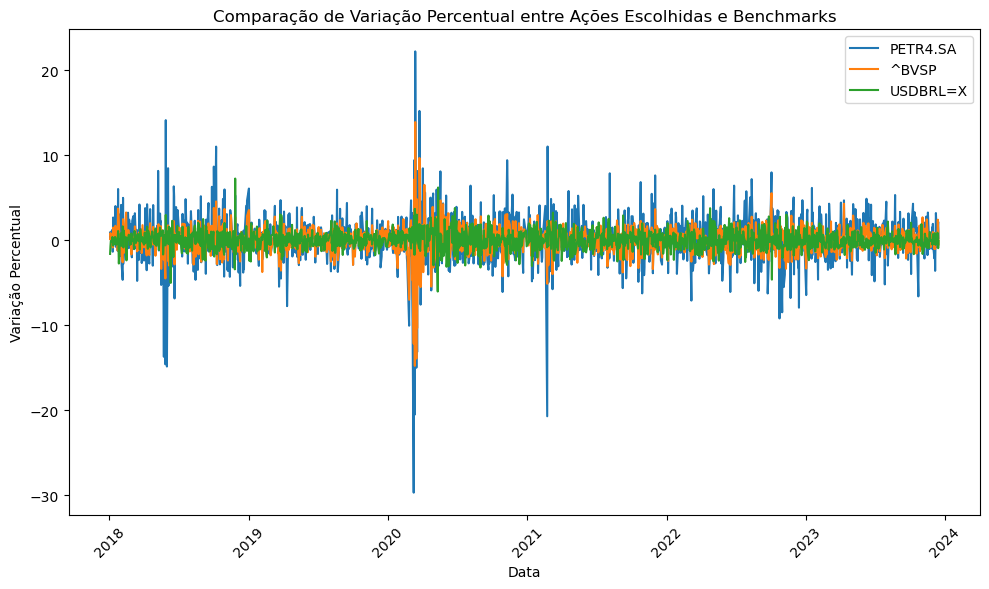

In [51]:

# Solicitar ao usuário que insira os códigos das ações separados por vírgula
acoes_escolhidas = input("Digite os códigos das ações que deseja incluir no gráfico, separados por vírgula (sem aspas e opcional '.SA'): ")

# Dividir as ações escolhidas separadas por vírgula
acoes_escolhidas = acoes_escolhidas.split(',')

# Remover espaços em branco ao redor de cada ação e adicionar ".SA" se necessário
acoes_escolhidas = [(acao.strip() + ".SA" if ".SA" not in acao else acao.strip()) for acao in acoes_escolhidas]

# Calcular as variações percentuais das ações e dos benchmarks escolhidos pelo usuário
precos_pct_change_escolhidas = precos[acoes_escolhidas].pct_change() * 100

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as variações percentuais das ações escolhidas pelo usuário
for coluna in precos_pct_change_escolhidas.columns:
    ax.plot(precos_pct_change_escolhidas.index, precos_pct_change_escolhidas[coluna], label=coluna)

# Plotar as variações percentuais dos benchmarks
for coluna in benchs_pct_change.columns:
    ax.plot(benchs_pct_change.index, benchs_pct_change[coluna], label=coluna)

# Adicionar legendas
ax.legend()

# Adicionar título e rótulos dos eixos
ax.set_title('Comparação de Variação Percentual entre Ações Escolhidas e Benchmarks')
ax.set_xlabel('Data')
ax.set_ylabel('Variação Percentual')

# Rotacionar as datas no eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()



In [ ]:
3º Calcular a regressão e extrair o Beta
